In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [10]:
from tensorflow import keras

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading and preparing the data
MNIST stands for “Modified National Institute of Standards and Technology”. It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black). This database is further divided into 60,000 training and 10,000 testing images.

In [12]:
#import dataset and split into train and test data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


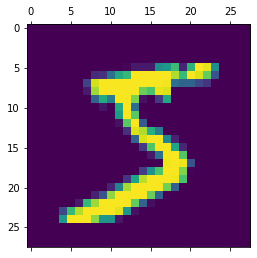

In [13]:
#to see how first image look
plt.matshow(x_train[0])

In [22]:
#normalize the images by scaling pixel intensities to the range 0,1
#normalizing helps to speed up the training and reduces chance of getting stuck in the local optima
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Creating the model
The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model 

# sgd = Stochastic gradient descent 


In [18]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [19]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6483 - accuracy: 0.8367 - val_loss: 0.3588 - val_accuracy: 0.9042
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3379 - accuracy: 0.9048 - val_loss: 0.2951 - val_accuracy: 0.9177
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2902 - accuracy: 0.9175 - val_loss: 0.2637 - val_accuracy: 0.9275
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2605 - accuracy: 0.9257 - val_loss: 0.2429 - val_accuracy: 0.9316
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2383 - accuracy: 0.9330 - val_loss: 0.2255 - val_accuracy: 0.9363
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2202 - accuracy: 0.9385 - val_loss: 0.2098 - val_accuracy: 0.9395
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2047 - accuracy: 0.9426 - val_loss: 0.1950 - val_accuracy:

# Evaluate the model 

In [21]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.9520
Loss=0.165
Accuracy=0.952


# Making Prediction on New Data

<function matplotlib.pyplot.show(close=None, block=None)>

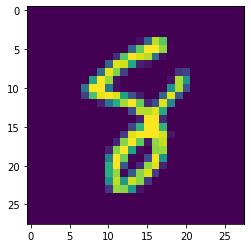

In [19]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [20]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 0s 1ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 966    0    1    2    0    4    5    1    1    0]
 [   0 1112    2    2    1    0    3    2   13    0]
 [   8    1  966   12    6    1    7   12   18    1]
 [   4    0    3  955    0   14    0   11   20    3]
 [   1    1    4    1  935    0   10    3    5   22]
 [   9    1    1   14    2  841   10    2    7    5]
 [  10    3    1    0   10    8  919    1    6    0]
 [   1    9   19    3    7    1    0  967    3   18]
 [   5    1    1   12    4    6    6    6  930    3]
 [   8    6    1    9   19    6    1    6   11  942]], shape=(10, 10), dtype=int32)
